<Figure size 432x288 with 0 Axes>

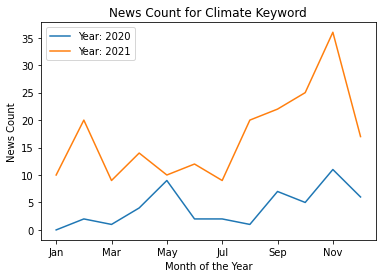

In [22]:
#Visuals for the presentation to partners 5/4/22
#**********Make sure you point to the right directory while retrieving data.



import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


#Consider just the Climate Keyword
for word in ['climate']:
    keyword_data = pd.read_csv('processed/'+ 'climate'  +'.csv')
    
 
#Consider just Ireland
keyword_data = keyword_data[keyword_data['country']=='ie']
keyword_data_2020 = keyword_data[keyword_data['year']==2020] #Extracts data for 2020
keyword_data_2021 = keyword_data[keyword_data['year']==2021] #Extracts data for 2021


month_count_2020 = []
month_count_2021 = []


for month in sorted(keyword_data['month'].unique()):#Select unique month
    month_count_2020.append( len(keyword_data_2020[keyword_data_2020['month']==month]) )#Count and store for each month

for month in sorted(keyword_data['month'].unique()):#Select unique month
    month_count_2021.append( len(keyword_data_2021[keyword_data_2021['month']==month]) )#Count and store for each month    


plt.figure()
df = pd.DataFrame({'Year: 2020': month_count_2020,'Year: 2021': month_count_2021}, index=index)
ax = df.plot.line(rot=0)
plt.xlabel('Month of the Year')#xlabel
plt.title('News Count for Climate Keyword')#Title
plt.ylabel('News Count')#ylabel
plt.savefig('News_Count_time_series',dpi = 100,facecolor = 'white')#Saves Figure with title 'News_Count_time_series'

<Figure size 432x288 with 0 Axes>

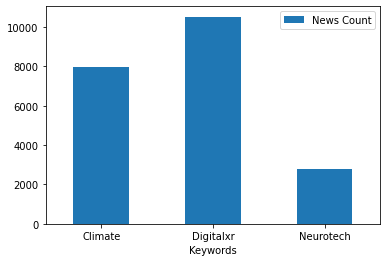

In [23]:
df = pd.DataFrame({'Keywords':['Climate', 'Digitalxr', 'Neurotech'], 'News Count':[7982, 10531, 2789]})


plt.figure()
ax = df.plot.bar(x='Keywords', y='News Count', rot=0)
plt.savefig('News_count',dpi = 100,facecolor = 'white')

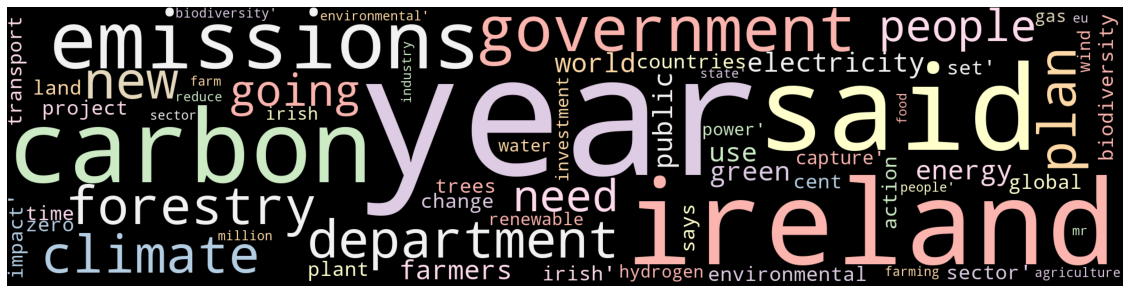

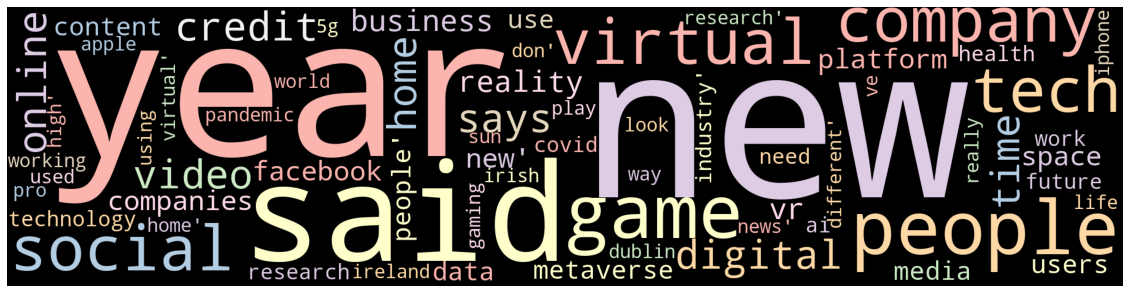

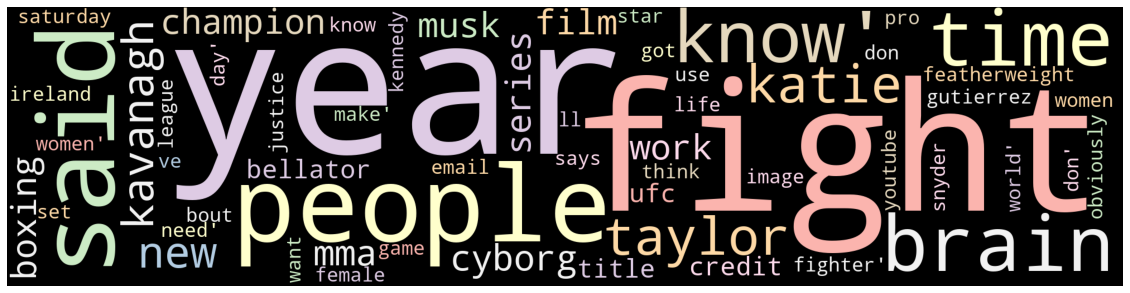

In [10]:
#LDA topics visualization


def plot_cloud(wordcloud,word):
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plt.savefig('ie_'+word+'myfig',dpi = 100,facecolor = 'white')


for word in ['climate','digitalxr','neurotech']:
    
    keyword_data = pd.read_csv('similarity_scores_sections/'+ word +'_'+'ie' +'.csv')#Load data just for ireland
    
    data = []
    
    #Ten is the number of topics.
    for i in range(10):
        data.append(  keyword_data.iloc[0]['Topic_'+str(i)] )
        
        
    data = str(data)
    
    #Remove characters using regular expression
    data = re.sub(r'==.*?==+', '',   data)
    data = data.replace('\n', '')
    
    wordcloud = WordCloud(width= 2000, height = 500, random_state=1, background_color='black',
                      colormap='Pastel1', collocations=False).generate(data)
    plot_cloud(wordcloud,word+'topic')

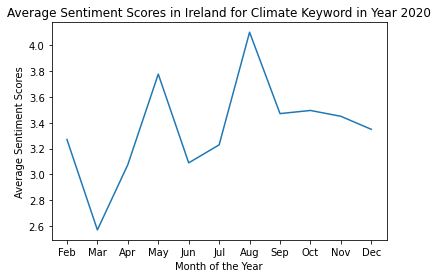

In [21]:
#Sentiment Visuals

index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


plt.figure()
for word in ['climate']:
    
    keyword_data = pd.read_csv('similarity_scores_with_topic/'+ word+'_'+'ie'  +'.csv')#Loads data just for Ireland
    
    #Find unique months and sort
    months =  sorted(keyword_data['month'].unique())
    
    
    for year in [2020]: #Considers year 2020.
    
        keyword_data = keyword_data[keyword_data['country']=='ie']#Selects just Ireland
        keyword_data = keyword_data[keyword_data['year']==year]#Selects the year
  


        month_count_2020 = []


        for month in months:
            #Stores mean sentiment scores per month
            month_count_2020.append(  keyword_data[keyword_data['month']==month]['sentiment_scores'].mean() )

 
 
        plt.plot(index, month_count_2020 ) 

plt.xlabel('Month of the Year')
plt.title('Average Sentiment Scores in Ireland for Climate Keyword in Year 2020')
plt.ylabel('Average Sentiment Scores')
#plt.legend(labels= [2020,2021])
plt.savefig('Sentiment_scores_time_series',dpi = 100, facecolor = 'white')

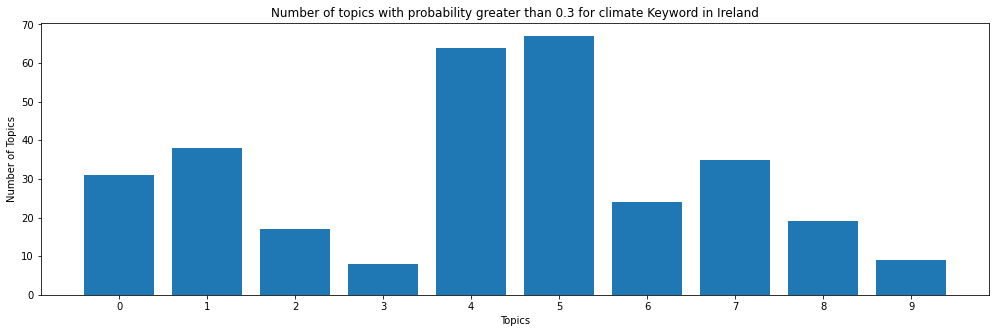

In [16]:
#Visual for count of topics with probability greather than 0.3 


fig, ax = plt.subplots(figsize=(17,5))
topic_dict = {}

#Choose Just the Climate Keyword
for word in ['climate']:
    
    keyword_data = pd.read_csv('similarity_scores_with_topic/'+ word +'_'+'ie' +'.csv')
    
    #Extract all the topics
    topic = []
    for ii in range(10):
        topic.append(keyword_data['Topic_'+str(ii)])
    
    
    #Counts the number of topics with probability greater than 0.3.
    for i in range(len(keyword_data)):
        for j in range(10):
            if keyword_data.iloc[i]['Topic_Probability'+str(j)]>0.3:
                topic_dict[j] = topic_dict.get(j,0) + 1
                
            
    topic_dict = dict(sorted(topic_dict.items()))      
    


    plt.bar(range(len(topic_dict)), list(topic_dict.values()), align='center', label=topic)
    plt.xticks(range(len(topic_dict)), list(topic_dict.keys()) )
    plt.xlabel('Topics')
    plt.ylabel('Number of Topics')
    #plt.legend()
    plt.title('Number of topics with probability greater than 0.3 for '+ word +' Keyword in Ireland')
    #plt.show()
    plt.savefig('Number of topics with probability greate '+word,dpi = 100, facecolor = 'white')

In [15]:
#Print Topics -- Choosing the first one in the array
for i in range(10):
    print('Topic'+str(i)+":", topic[i][0])

Topic0: forestry trees project environmental department biodiversity ireland plant land impact
Topic1: climate action said carbon government ireland emissions plan new sector
Topic2: says people going years just time like need year irish
Topic3: cent plan transport 000 electricity public emissions 2030 use set
Topic4: carbon climate emissions change global energy world countries zero capture
Topic5: energy hydrogen green wind ireland gas electricity said renewable power
Topic6: ireland water public carbon irish years people government investment biodiversity
Topic7: emissions farmers carbon reduce farming agriculture food use farm environmental
Topic8: said year new green need world million going eu people
Topic9: mr department forestry said industry year government farmers sector state
